In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

# display all columns from pandas data frames
pd.options.display.max_columns = None

#data = "../../data/LULESH/inclusive/weak"
#data = "../data/mpi_scaling_cali/"
data = "../../data/LULESH/exclusive/weak"
t_ens = th.Thicket.from_caliperreader(data)

help(t_ens.tree)

Help on method tree in module thicket.thicket:

tree(metric_column=None, annotation_column=None, precision=3, name_column='name', expand_name=False, context_column='file', rank=0, thread=0, depth=10000, highlight_name=False, colormap='RdYlGn', invert_colormap=False, colormap_annotations=None, render_header=True, min_value=None, max_value=None) method of thicket.thicket.Thicket instance
    Visualize the Thicket as a tree
    
    Arguments:
        metric_column (str, tuple, list, optional): Columns to use the metrics from. Defaults to None.
        annotation_column (str, optional): Column to use as an annotation. Defaults to None.
        precision (int, optional): Precision of shown numbers. Defaults to 3.
        name_column (str, optional): Column of the node name. Defaults to "name".
        expand_name (bool, optional): Limits the lenght of the node name. Defaults to False.
        context_column (str, optional): Shows the file this function was called in (Available with HPCTool

In [2]:
t_ens.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,executablepath,cmdline,cluster,jobsize,numhosts,hostlist,threads,iterations,problem_size,num_regions,region_cost,region_balance,Compiler Name,Compiler Version,Built by,Compiler Flags,elapsed_time,figure_of_merit
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3779287,2.11.0-dev,343,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694078642,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,343,10,"[quartz1814, quartz1816, quartz2017, quartz201...",1,9999999,40,11,1,1,GNU,10.3.1,ritter5,,1083.794737,207408.720725
7785351,2.11.0-dev,343,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694078215,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,343,10,"[quartz2359, quartz2563, quartz2613, quartz262...",1,9999999,30,11,1,1,GNU,10.3.1,ritter5,,348.052682,202859.703771
63455544,2.11.0-dev,343,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694055735,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,343,10,"[quartz1340, quartz1341, quartz1342, quartz263...",1,9999999,10,11,1,1,GNU,10.3.1,ritter5,,6.794493,121257.907669
79447873,2.11.0-dev,343,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694079049,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,343,10,"[quartz136, quartz137, quartz138, quartz743, q...",1,9999999,50,11,1,1,GNU,10.3.1,ritter5,,2830.041175,194707.237808
83243224,2.11.0-dev,216,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694046917,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,216,6,"[quartz1047, quartz1048, quartz1049, quartz105...",1,9999999,10,11,1,1,GNU,10.3.1,ritter5,,5.670511,77364.459372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120419190,2.11.0-dev,27,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694042456,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,27,1,[quartz2938],2,9999999,10,11,1,1,GNU,10.3.1,ritter5,,2.421628,10391.357589
4181607992,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694044004,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,64,2,"[quartz1700, quartz2487]",2,9999999,50,11,1,1,GNU,10.3.1,ritter5,,1408.248526,41174.550468
4184853318,2.11.0-dev,216,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,profile.mpi,time.exclusive",regionprofile,spot,ritter5,1694047065,/usr/WS2/ritter5/LULESH/build/lulesh2.0,"[/usr/WS2/ritter5/LULESH/./build/lulesh2.0, -s...",quartz,216,6,"[quartz1047, quartz1048, quartz1049, quartz105...",1,9999999,30,11,1,1,GNU,10.3.1,ritter5,,295.211336,128389.947780


In [3]:
mdl = Modeling(
    t_ens,
    parameters=[
        "jobsize",
        #"problem_size",
    ],
    metrics=[
        #"Avg time/rank",
        "Avg time/rank (exc)",
        #"Total time",
    ],
)

mdl.produce_models(use_median=True)

# use the mean values for modeling
#mdl.produce_models(use_median=False)

In [4]:
t_ens.statsframe.dataframe

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model
node,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.008208755299232064 + 0.0003718523497365468 *...,6.126005e-07,0.006114,3.256699,0.743588,0.027427
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.009937080952380958 + 0.007142814285714288 *...,3.033116e-06,0.007269,3.287004,0.995762,0.027221
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-0.012007314285714289 + 0.008223014285714288 *...,1.678652e-06,0.003539,2.657153,0.998228,0.021927
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.054256938095238134 + 0.04259117142857143 * ...,1.459032e-06,0.000275,0.591488,0.999943,0.004919
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.019012764713562162 + 0.006575695085289671 *...,2.207172e-04,0.090645,11.038209,0.990724,0.088170
"{'name': 'MPI_Waitall', 'type': 'function'}",MPI_Waitall,-0.011242960921092345 + 0.0018013032287122418 ...,2.662625e-01,24.086336,78.014509,0.721758,1.306048
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,0.0012360538871658254 + 0.00036944767129111565...,4.971435e-07,0.014465,3.581461,0.997715,0.030795
"{'name': 'MPI_Wait', 'type': 'function'}",MPI_Wait,0.06755708333333334,5.576674e-03,12.403994,41.220236,1.000000,0.150209
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,-0.001039108240400175 + 0.00044530372518938573...,1.447227e-06,8.545707,48.405904,0.617853,0.685289


<Figure size 432x288 with 0 Axes>

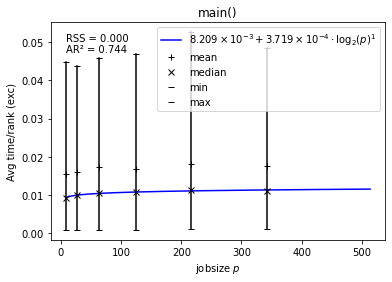

In [6]:
model_obj = t_ens.statsframe.dataframe.at[t_ens.statsframe.dataframe.index[0], "Avg time/rank (exc)_extrap-model"]

len(t_ens.statsframe.dataframe)

plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1*log2(q)**2")
 
# Plot graph
plt.show()


,Avg time/rank (exc)_extrap-model
node,
"{'name': 'main', 'type': 'function'}",
"{'name': 'CommRecv', 'type': 'function'}",
"{'name': 'MPI_Irecv', 'type': 'function'}",
"{'name': 'CommSend', 'type': 'function'}",
"{'name': 'MPI_Isend', 'type': 'function'}",
"{'name': 'MPI_Waitall', 'type': 'function'}",
"{'name': 'CommSBN', 'type': 'function'}",
"{'name': 'MPI_Wait', 'type': 'function'}",
"{'name': 'MPI_Barrier', 'type': 'function'}",

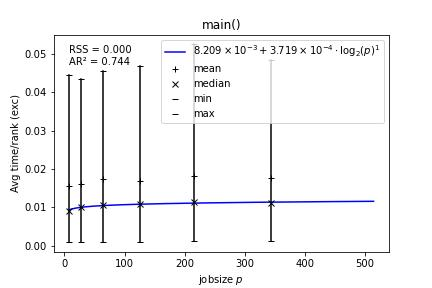
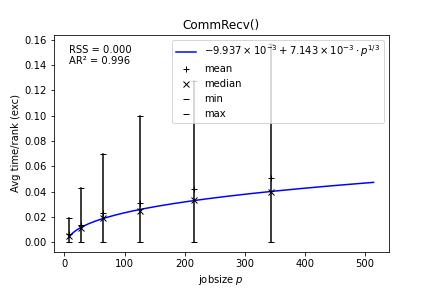
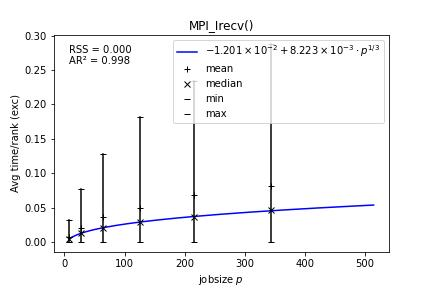
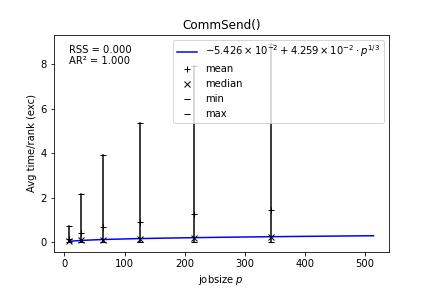
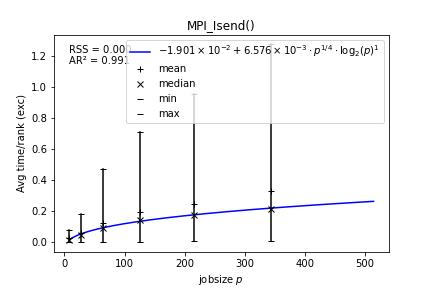
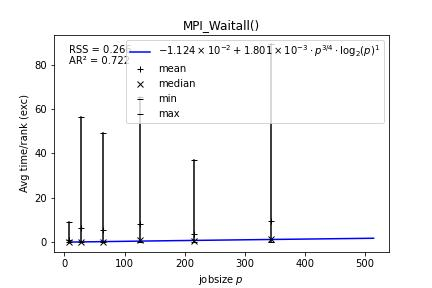
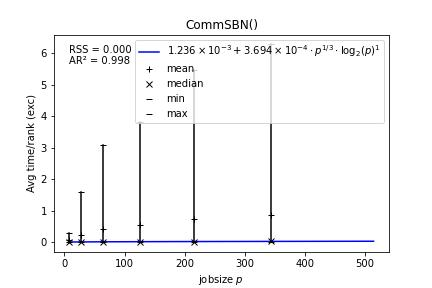
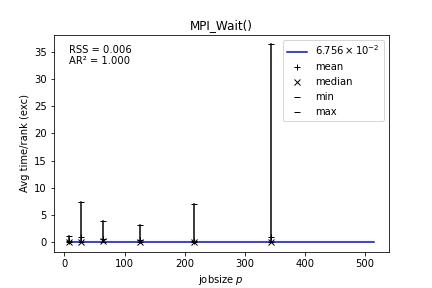
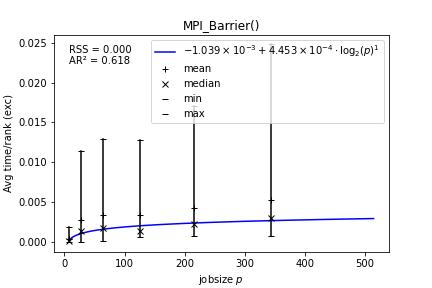
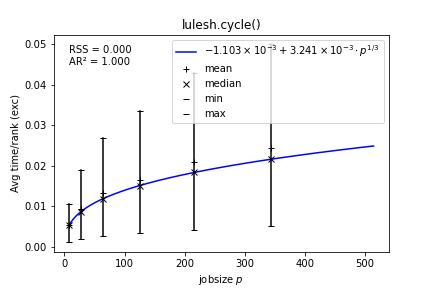
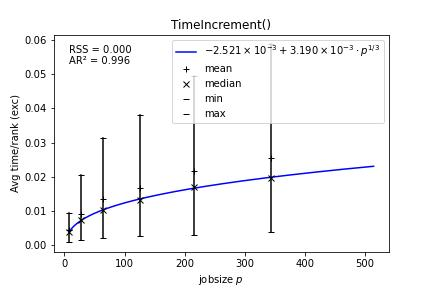
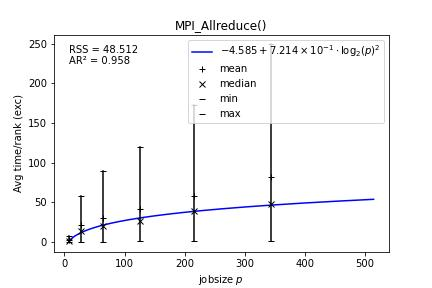
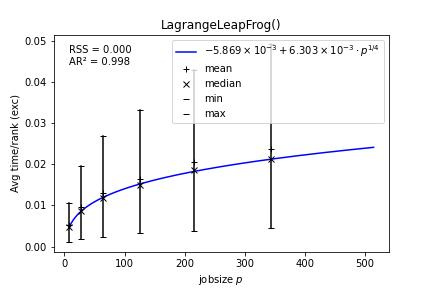
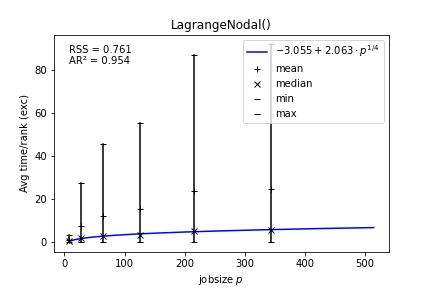
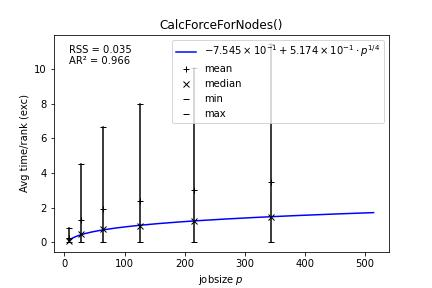
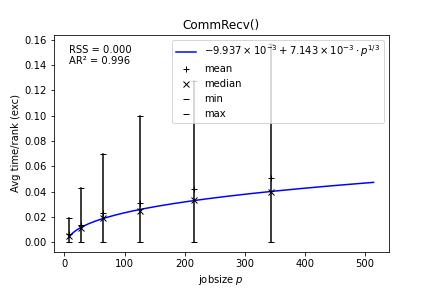
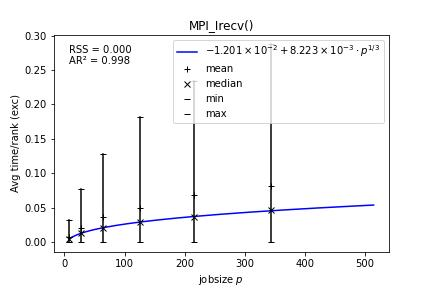
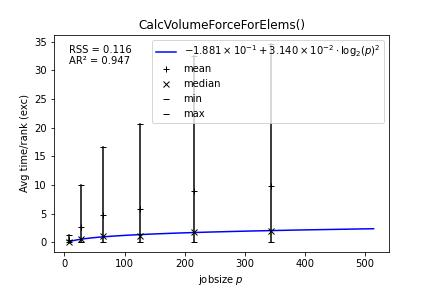
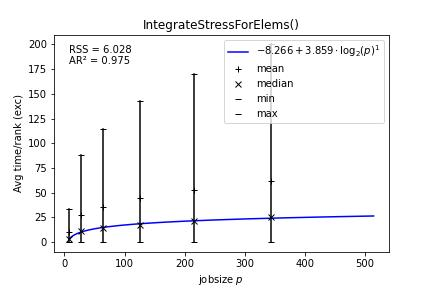
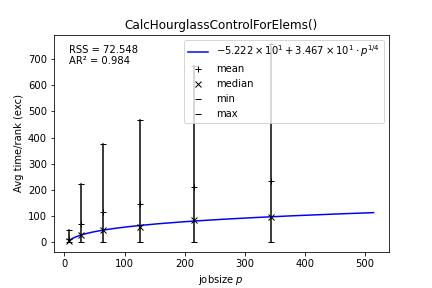
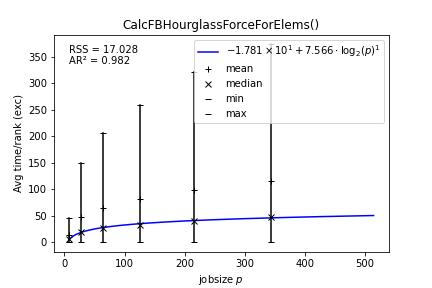
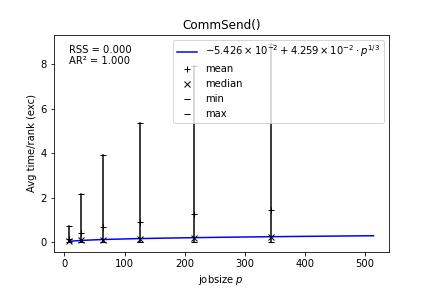
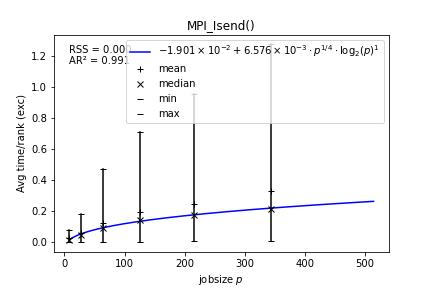
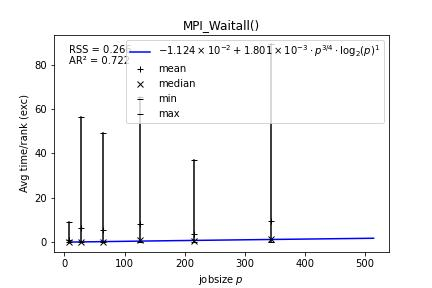
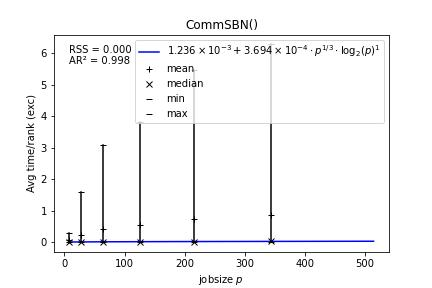
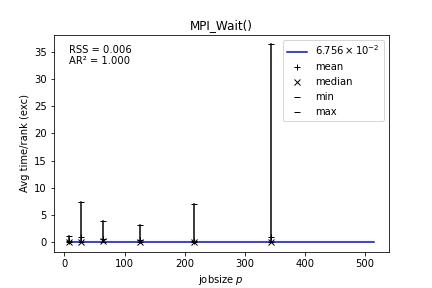
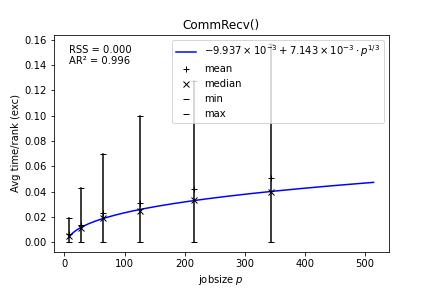
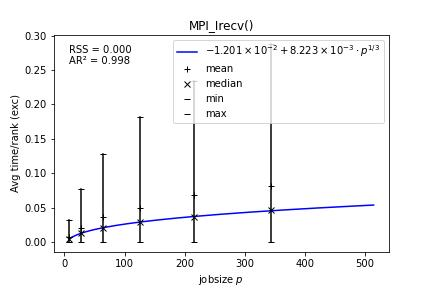
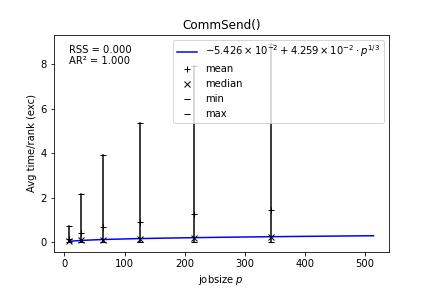
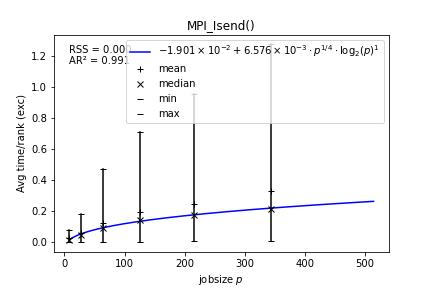
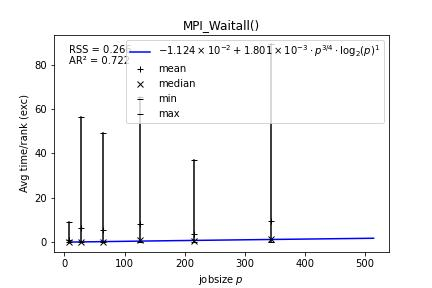
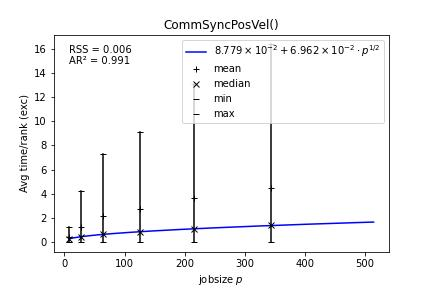
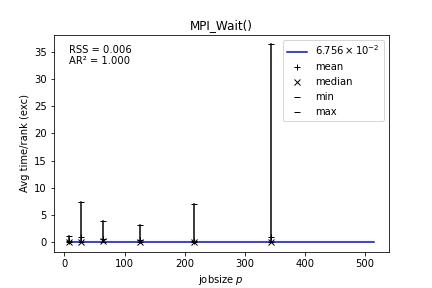
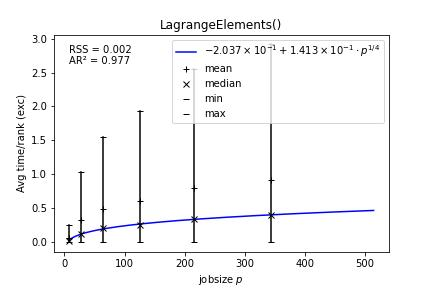
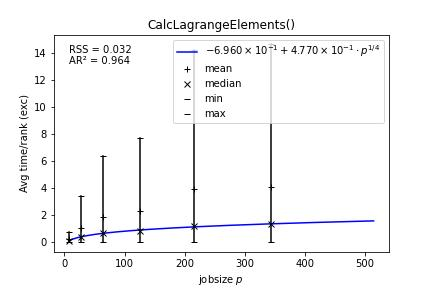
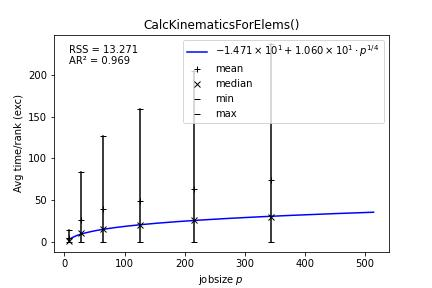
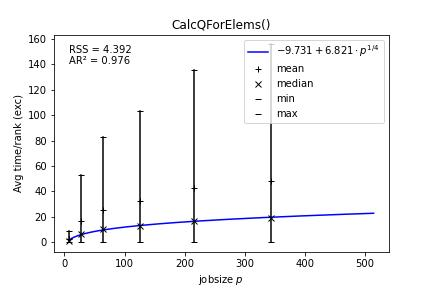
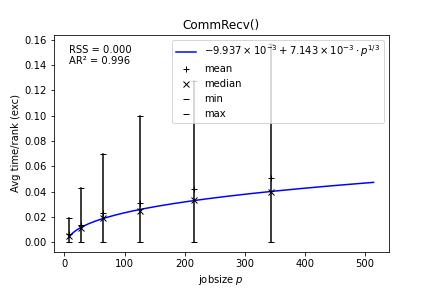
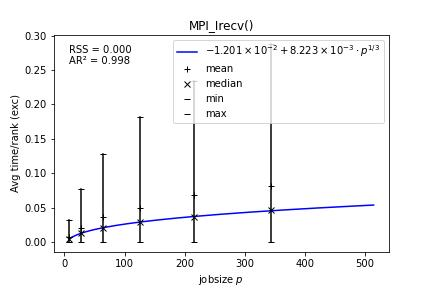
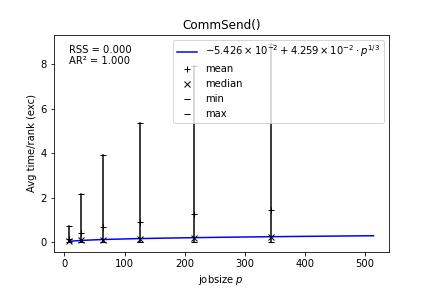
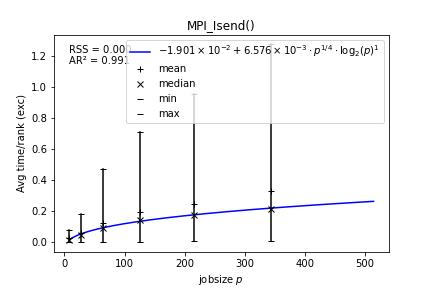
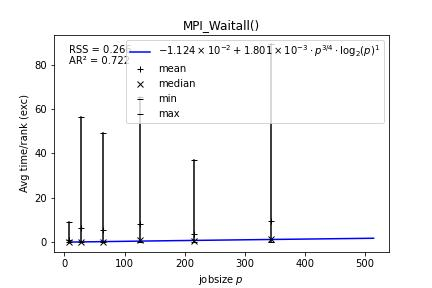
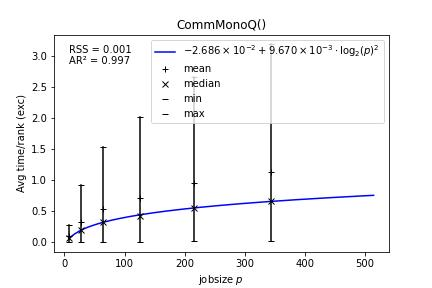
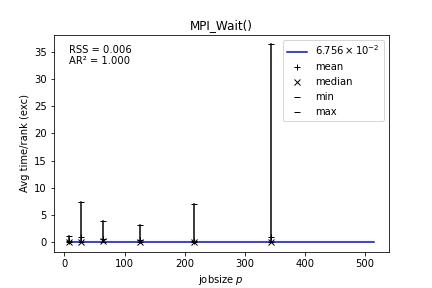
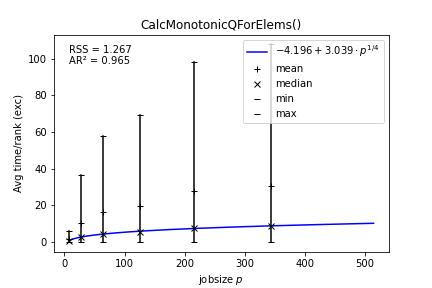
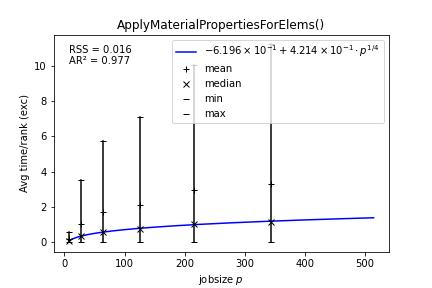
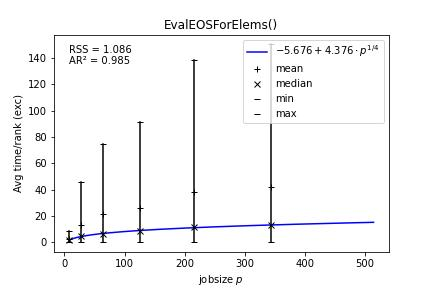
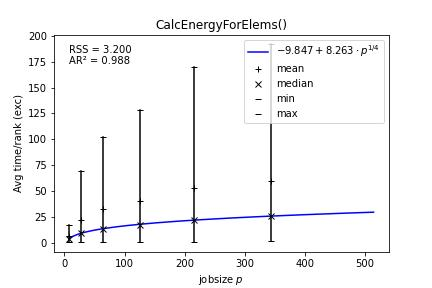
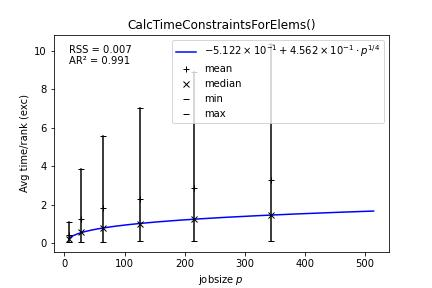
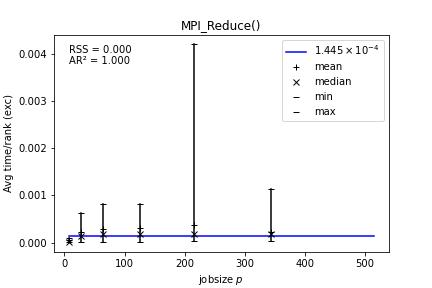
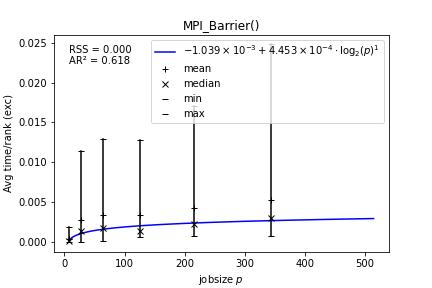
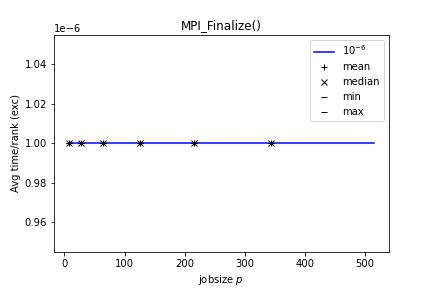
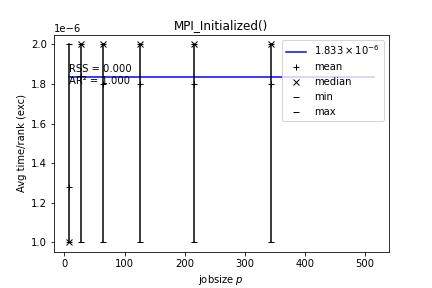
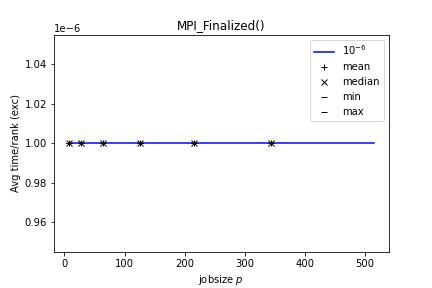
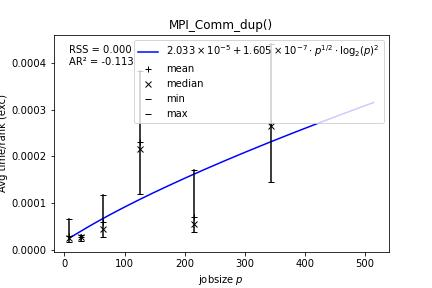

In [7]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=False)))


In [8]:
mdl.componentize_statsframe()

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(3/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, p^(1/2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))"
node,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.008208755299232064 + 0.0003718523497365468 *...,6.126005e-07,0.006114,3.256699,0.743588,0.027427,0.008209,0.000372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.009937080952380958 + 0.007142814285714288 *...,3.033116e-06,0.007269,3.287004,0.995762,0.027221,-0.009937,NaN,0.007143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-0.012007314285714289 + 0.008223014285714288 *...,1.678652e-06,0.003539,2.657153,0.998228,0.021927,-0.012007,NaN,0.008223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.054256938095238134 + 0.04259117142857143 * ...,1.459032e-06,0.000275,0.591488,0.999943,0.004919,-0.054257,NaN,0.042591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.019012764713562162 + 0.006575695085289671 *...,2.207172e-04,0.090645,11.038209,0.990724,0.088170,-0.019013,NaN,NaN,0.006576,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Waitall', 'type': 'function'}",MPI_Waitall,-0.011242960921092345 + 0.0018013032287122418 ...,2.662625e-01,24.086336,78.014509,0.721758,1.306048,-0.011243,NaN,NaN,NaN,0.001801,NaN,NaN,NaN,NaN,NaN
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,0.0012360538871658254 + 0.00036944767129111565...,4.971435e-07,0.014465,3.581461,0.997715,0.030795,0.001236,NaN,NaN,NaN,NaN,0.000369,NaN,NaN,NaN,NaN
"{'name': 'MPI_Wait', 'type': 'function'}",MPI_Wait,0.06755708333333334,5.576674e-03,12.403994,41.220236,1.000000,0.150209,0.067557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,-0.001039108240400175 + 0.00044530372518938573...,1.447227e-06,8.545707,48.405904,0.617853,0.685289,-0.001039,0.000445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mdl.complexity_statsframe(eval_target=[512])

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(3/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, p^(1/2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))",Avg time/rank (exc)_extrap-model_complexity,Avg time/rank (exc)_extrap-model_coefficient,Avg time/rank (exc)_extrap-model_growth_rank,Avg time/rank (exc)_extrap-model_colormapping
node,,,,,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.008208755299232064 + 0.0003718523497365468 *...,6.126005e-07,0.006114,3.256699,0.743588,0.027427,0.008209,0.000372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(1),8.208755e-03,48,[38;2;57;59;121m
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.009937080952380958 + 0.007142814285714288 *...,3.033116e-06,0.007269,3.287004,0.995762,0.027221,-0.009937,NaN,0.007143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),7.142814e-03,42,[38;2;107;110;207m
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-0.012007314285714289 + 0.008223014285714288 *...,1.678652e-06,0.003539,2.657153,0.998228,0.021927,-0.012007,NaN,0.008223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),8.223014e-03,38,[38;2;107;110;207m
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.054256938095238134 + 0.04259117142857143 * ...,1.459032e-06,0.000275,0.591488,0.999943,0.004919,-0.054257,NaN,0.042591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),4.259117e-02,26,[38;2;107;110;207m
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.019012764713562162 + 0.006575695085289671 *...,2.207172e-04,0.090645,11.038209,0.990724,0.088170,-0.019013,NaN,NaN,0.006576,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/4)*log2(p)**(1)),6.575695e-03,30,[38;2;99;121;57m
"{'name': 'MPI_Waitall', 'type': 'function'}",MPI_Waitall,-0.011242960921092345 + 0.0018013032287122418 ...,2.662625e-01,24.086336,78.014509,0.721758,1.306048,-0.011243,NaN,NaN,NaN,0.001801,NaN,NaN,NaN,NaN,NaN,O(p**(3/4)*log2(p)**(1)),1.801303e-03,15,[38;2;181;207;107m
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,0.0012360538871658254 + 0.00036944767129111565...,4.971435e-07,0.014465,3.581461,0.997715,0.030795,0.001236,NaN,NaN,NaN,NaN,0.000369,NaN,NaN,NaN,NaN,O(p**(1/3)*log2(p)**(1)),3.694477e-04,44,[38;2;140;109;49m
"{'name': 'MPI_Wait', 'type': 'function'}",MPI_Wait,0.06755708333333334,5.576674e-03,12.403994,41.220236,1.000000,0.150209,0.067557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(1),6.755708e-02,34,[38;2;57;59;121m
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,-0.001039108240400175 + 0.00044530372518938573...,1.447227e-06,8.545707,48.405904,0.617853,0.685289,-0.001039,0.000445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(log2(p)**(1)),4.453037e-04,50,[38;2;231;186;82m


In [12]:
# sort by growth rank to identify bottlenecks
x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_growth_rank"])
x

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(3/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, p^(1/2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))",Avg time/rank (exc)_extrap-model_complexity,Avg time/rank (exc)_extrap-model_coefficient,Avg time/rank (exc)_extrap-model_growth_rank,Avg time/rank (exc)_extrap-model_colormapping
node,,,,,,,,,,,,,,,,,,,,,
"{'name': 'CalcHourglassControlForElems', 'type': 'function'}",CalcHourglassControlForElems,-52.221917795061785 + 34.66872937997491 * p^(1/4),7.254760e+01,0.119764,10.955549,0.984341,0.098625,-52.221918,NaN,NaN,NaN,NaN,NaN,NaN,34.668729,NaN,NaN,O(p**(1/4)),3.466873e+01,1,[38;2;214;97;107m
"{'name': 'MPI_Allreduce', 'type': 'function'}",MPI_Allreduce,-4.585159890717679 + 0.7213882551682822 * log2...,4.851249e+01,0.097324,12.806858,0.957715,0.104670,-4.585160,NaN,NaN,NaN,NaN,NaN,0.721388,NaN,NaN,NaN,O(log2(p)**(2)),7.213883e-01,2,[38;2;132;60;57m
"{'name': 'CalcFBHourglassForceForElems', 'type': 'function'}",CalcFBHourglassForceForElems,-17.805374877232584 + 7.565668262163967 * log2...,1.702760e+01,0.049793,9.123275,0.981801,0.072676,-17.805375,7.565668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(log2(p)**(1)),7.565668e+00,3,[38;2;231;186;82m
"{'name': 'CalcKinematicsForElems', 'type': 'function'}",CalcKinematicsForElems,-14.709471194065218 + 10.59651173507995 * p^(1/4),1.327083e+01,2.281286,23.281075,0.969370,0.299058,-14.709471,NaN,NaN,NaN,NaN,NaN,NaN,10.596512,NaN,NaN,O(p**(1/4)),1.059651e+01,4,[38;2;214;97;107m
"{'name': 'CalcEnergyForElems', 'type': 'function'}",CalcEnergyForElems,-9.847316806282757 + 8.263040450689667 * p^(1/4),3.200226e+00,0.064680,8.582755,0.987814,0.074110,-9.847317,NaN,NaN,NaN,NaN,NaN,NaN,8.263040,NaN,NaN,O(p**(1/4)),8.263040e+00,5,[38;2;214;97;107m
"{'name': 'IntegrateStressForElems', 'type': 'function'}",IntegrateStressForElems,-8.266349427243215 + 3.858798099048354 * log2(...,6.027677e+00,0.026119,7.385176,0.975307,0.060679,-8.266349,3.858798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(log2(p)**(1)),3.858798e+00,6,[38;2;231;186;82m
"{'name': 'CalcQForElems', 'type': 'function'}",CalcQForElems,-9.731028442703375 + 6.821431413284326 * p^(1/4),4.391981e+00,1.858109,22.399929,0.975515,0.276172,-9.731028,NaN,NaN,NaN,NaN,NaN,NaN,6.821431,NaN,NaN,O(p**(1/4)),6.821431e+00,7,[38;2;214;97;107m
"{'name': 'EvalEOSForElems', 'type': 'function'}",EvalEOSForElems,-5.67628802876481 + 4.376229332754081 * p^(1/4),1.085984e+00,0.138977,10.880082,0.985268,0.097948,-5.676288,NaN,NaN,NaN,NaN,NaN,NaN,4.376229,NaN,NaN,O(p**(1/4)),4.376229e+00,8,[38;2;214;97;107m
"{'name': 'CalcMonotonicQForElems', 'type': 'function'}",CalcMonotonicQForElems,-4.19642798453829 + 3.038975186504982 * p^(1/4),1.267343e+00,1.096930,21.421023,0.964557,0.235244,-4.196428,NaN,NaN,NaN,NaN,NaN,NaN,3.038975,NaN,NaN,O(p**(1/4)),3.038975e+00,9,[38;2;214;97;107m


In [14]:
x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_growth_rank")
for key, value in x.groups.items():
    print(key)
    print(value)


1
Index([{'name': 'CalcHourglassControlForElems', 'type': 'function'}], dtype='object', name='node')
2
Index([{'name': 'MPI_Allreduce', 'type': 'function'}], dtype='object', name='node')
3
Index([{'name': 'CalcFBHourglassForceForElems', 'type': 'function'}], dtype='object', name='node')
4
Index([{'name': 'CalcKinematicsForElems', 'type': 'function'}], dtype='object', name='node')
5
Index([{'name': 'CalcEnergyForElems', 'type': 'function'}], dtype='object', name='node')
6
Index([{'name': 'IntegrateStressForElems', 'type': 'function'}], dtype='object', name='node')
7
Index([{'name': 'CalcQForElems', 'type': 'function'}], dtype='object', name='node')
8
Index([{'name': 'EvalEOSForElems', 'type': 'function'}], dtype='object', name='node')
9
Index([{'name': 'CalcMonotonicQForElems', 'type': 'function'}], dtype='object', name='node')
10
Index([{'name': 'LagrangeNodal', 'type': 'function'}], dtype='object', name='node')
11
Index([{'name': 'CalcVolumeForceForElems', 'type': 'function'}], dtype=

In [15]:
phase_df = mdl.phase_statsframe(eval_target=512)
phase_df

columns: ['Avg time/rank (exc)_extrap-model']
callpaths: ['main', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSBN', 'MPI_Wait', 'MPI_Barrier', 'lulesh.cycle', 'TimeIncrement', 'MPI_Allreduce', 'LagrangeLeapFrog', 'LagrangeNodal', 'CalcForceForNodes', 'CommRecv', 'MPI_Irecv', 'CalcVolumeForceForElems', 'IntegrateStressForElems', 'CalcHourglassControlForElems', 'CalcFBHourglassForceForElems', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSBN', 'MPI_Wait', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommSyncPosVel', 'MPI_Wait', 'LagrangeElements', 'CalcLagrangeElements', 'CalcKinematicsForElems', 'CalcQForElems', 'CommRecv', 'MPI_Irecv', 'CommSend', 'MPI_Isend', 'MPI_Waitall', 'CommMonoQ', 'MPI_Wait', 'CalcMonotonicQForElems', 'ApplyMaterialPropertiesForElems', 'EvalEOSForElems', 'CalcEnergyForElems', 'CalcTimeConstraintsForElems', 'MPI_Reduce', 'MPI_Barrier', 'MPI_Finalize', 'MPI_Initialized', 'MPI_Finalized', 'MPI_Comm_dup']
communication: 

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model,"(Avg time/rank (exc)_extrap-model, c)","(Avg time/rank (exc)_extrap-model, log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3))","(Avg time/rank (exc)_extrap-model, p^(1/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(3/4) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, p^(1/3) * log2(p)^(1))","(Avg time/rank (exc)_extrap-model, log2(p)^(2))","(Avg time/rank (exc)_extrap-model, p^(1/4))","(Avg time/rank (exc)_extrap-model, p^(1/2))","(Avg time/rank (exc)_extrap-model, p^(1/2) * log2(p)^(2))",Avg time/rank (exc)_extrap-model_complexity,Avg time/rank (exc)_extrap-model_coefficient,Avg time/rank (exc)_extrap-model_growth_rank,Avg time/rank (exc)_extrap-model_colormapping
node,,,,,,,,,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,0.008208755299232064 + 0.0003718523497365468 *...,6.126005e-07,0.006114,3.256699,0.743588,0.027427,0.008209,0.000372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(1),8.208755e-03,48,[38;2;57;59;121m
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.009937080952380958 + 0.007142814285714288 *...,3.033116e-06,0.007269,3.287004,0.995762,0.027221,-0.009937,NaN,0.007143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),7.142814e-03,42,[38;2;107;110;207m
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,-0.012007314285714289 + 0.008223014285714288 *...,1.678652e-06,0.003539,2.657153,0.998228,0.021927,-0.012007,NaN,0.008223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),8.223014e-03,38,[38;2;107;110;207m
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.054256938095238134 + 0.04259117142857143 * ...,1.459032e-06,0.000275,0.591488,0.999943,0.004919,-0.054257,NaN,0.042591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/3)),4.259117e-02,26,[38;2;107;110;207m
"{'name': 'MPI_Isend', 'type': 'function'}",MPI_Isend,-0.019012764713562162 + 0.006575695085289671 *...,2.207172e-04,0.090645,11.038209,0.990724,0.088170,-0.019013,NaN,NaN,0.006576,NaN,NaN,NaN,NaN,NaN,NaN,O(p**(1/4)*log2(p)**(1)),6.575695e-03,30,[38;2;99;121;57m
"{'name': 'MPI_Waitall', 'type': 'function'}",MPI_Waitall,-0.011242960921092345 + 0.0018013032287122418 ...,2.662625e-01,24.086336,78.014509,0.721758,1.306048,-0.011243,NaN,NaN,NaN,0.001801,NaN,NaN,NaN,NaN,NaN,O(p**(3/4)*log2(p)**(1)),1.801303e-03,15,[38;2;181;207;107m
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,0.0012360538871658254 + 0.00036944767129111565...,4.971435e-07,0.014465,3.581461,0.997715,0.030795,0.001236,NaN,NaN,NaN,NaN,0.000369,NaN,NaN,NaN,NaN,O(p**(1/3)*log2(p)**(1)),3.694477e-04,44,[38;2;140;109;49m
"{'name': 'MPI_Wait', 'type': 'function'}",MPI_Wait,0.06755708333333334,5.576674e-03,12.403994,41.220236,1.000000,0.150209,0.067557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(1),6.755708e-02,34,[38;2;57;59;121m
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,-0.001039108240400175 + 0.00044530372518938573...,1.447227e-06,8.545707,48.405904,0.617853,0.685289,-0.001039,0.000445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O(log2(p)**(1)),4.453037e-04,50,[38;2;231;186;82m
